In [69]:
def U(*shape):
    x = torch.rand(*shape)
    x = (x - 0.5) * 2.0
    return x

In [75]:
network_configs = [{
    'in_features': 256, 
    'hidden_layers': [64, 16],
    'out_features': 3,
}] * 3

In [76]:
network_configs

[{'in_features': 256, 'hidden_layers': [64, 16], 'out_features': 3},
 {'in_features': 256, 'hidden_layers': [64, 16], 'out_features': 3},
 {'in_features': 256, 'hidden_layers': [64, 16], 'out_features': 3}]

In [71]:
model = ParallelSplitNet(network_configs)

In [72]:
x = U(2000, 2)

In [74]:
model(x)

torch.Size([2000, 3])

In [77]:
from spellbook import count_parameters

In [78]:
count_parameters(model)

+--------------------------------+------------+
|            Modules             | Parameters |
+--------------------------------+------------+
| networks.0.net.0.linear.weight |   65536    |
|  networks.0.net.0.linear.bias  |    256     |
| networks.0.net.1.linear.weight |    4096    |
|  networks.0.net.1.linear.bias  |     64     |
|    networks.0.net.2.weight     |     48     |
|     networks.0.net.2.bias      |     3      |
| networks.1.net.0.linear.weight |   65536    |
|  networks.1.net.0.linear.bias  |    256     |
| networks.1.net.1.linear.weight |    4096    |
|  networks.1.net.1.linear.bias  |     64     |
|    networks.1.net.2.weight     |     48     |
|     networks.1.net.2.bias      |     3      |
| networks.2.net.0.linear.weight |   65536    |
|  networks.2.net.0.linear.bias  |    256     |
| networks.2.net.1.linear.weight |    4096    |
|  networks.2.net.1.linear.bias  |     64     |
|    networks.2.net.2.weight     |     48     |
|     networks.2.net.2.bias      |     3

210009

In [7]:
from train_pipeline import train, _train_seed

import os
from hydra import initialize, initialize_config_module, initialize_config_dir, compose
from hydra.utils import instantiate
from omegaconf import OmegaConf


def load_cfg(overrides=()):
    # with initialize_config_dir(config_dir="/app/notebooks/draft_02/conf"):
    with initialize(version_base=None, config_path="./conf"):
        cfg = compose(config_name='config', overrides=list(overrides))
        return cfg

from IPython.display import clear_output

cfg = load_cfg(overrides=[
    "+exp=04_parallel",
    # "optimizer.lr=1e-3",
    "+device=cuda:0",
])


print(OmegaConf.to_yaml(cfg))

image: sasha.jpg
image_dir: ../../data
image_W: 512
use_wandb: true
is_debug: false
total_steps: 3000
random_seed:
- 0
- 1
- 2
- 3
- 4
model:
  _target_: spellbook.parallel.ParallelSplitNet
  encoding_size: 64
  model_configs:
  - hidden_layers:
    - 64
    - 16
  - hidden_layers:
    - 64
    - 16
  - hidden_layers:
    - 64
    - 16
  - hidden_layers:
    - 64
    - 16
logging:
  logger:
    _target_: spellbook.logging.wandb.WandbLogger
    project: 01_splitnet__${image}
  steps_till_summary: 500
  experiment_name: parallel_splitnet_2
optimizer:
  _target_: torch.optim.AdamW
  weight_decay: 0.0
  lr: 0.0001
device: cuda:0



Setting seed to 0


********************************************************************************


image: sasha.jpg
image_dir: ../../data
image_W: 512
use_wandb: true
is_debug: false
total_steps: 3000
random_seed:
- 0
- 1
- 2
- 3
- 4
model:
  _target_: spellbook.parallel.ParallelSplitNet
  encoding_size: 64
  model_configs:
  - hidden_layers:
    - 64
    - 16
  - hidden_layers:
    - 64
    - 16
  - hidden_layers:
    - 64
    - 16
  - hidden_layers:
    - 64
    - 16
logging:
  logger:
    _target_: spellbook.logging.wandb.WandbLogger
    project: 01_splitnet__${image}
  steps_till_summary: 500
  experiment_name: parallel_splitnet_2
optimizer:
  _target_: torch.optim.AdamW
  weight_decay: 0.0
  lr: 0.0001
device: cuda:0


********************************************************************************
+--------------------------------+------------+
|            Modules             | Parameters |
+--------------------------------+------------+
| networks.0.net.0.linear.weight |   32768    |
|  networ

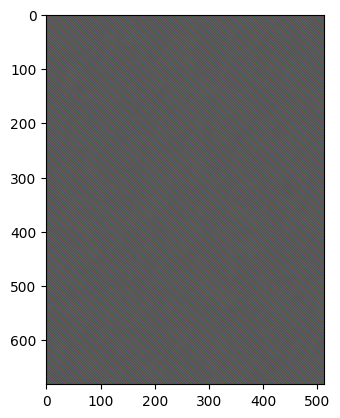

In [ ]:
train(cfg)
# print(cfg.logging.experiment_name)
# _train_seed(cfg, random_seed=0)